# Test demogrpahic stochasticity model 

## Effect of seleciton on varince
### Is the varicne of survival under seleciton substantially different that a binomial distribution?

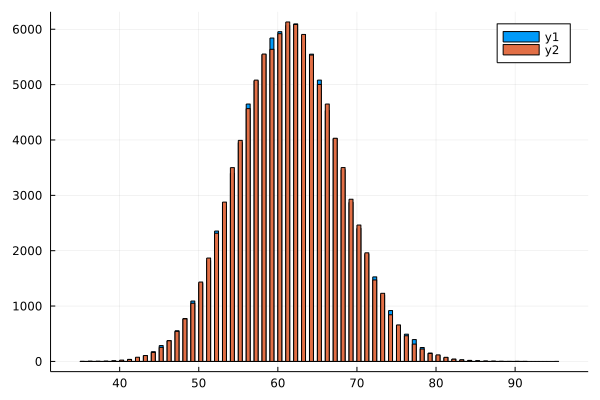

In [72]:
using Distributions
using Plots
N = 200
mu = 5.0
Vle = 1.0
s = 0.1
p(x) = exp(-s*x^2/2.0)
d = Distributions.Normal(mu,sqrt(Vle))
Nmc = 100000
vals = zeros(Nmc)
Threads.@threads for i in 1:Nmc
    z = rand(d,N)
    acc = 0
    for j in 1:N
        if p(z[j]) > rand(1)[1]
            acc+=1
        end 
    end
    vals[i] = acc
end 
Plots.histogram(vals)
prob = mean(vals)/N
d2 = Distributions.Binomial(N,prob)
sim_vals = rand(d2, Nmc)
Plots.histogram!(rand(d2, Nmc))

In [70]:
println(var(sim_vals))
println(var(vals))

4.256789273492735
4.247881134411344


## Apperently no 

The variance is a bit less when there are differn survival probabilities between individuals, but not by much. 


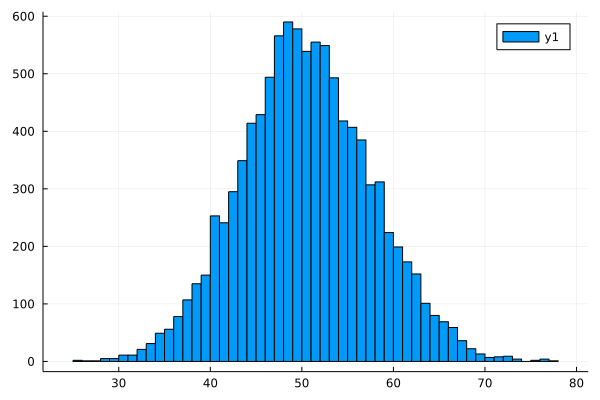

In [77]:
Plots.histogram(rand(Distributions.Poisson(50),10000))